In [1]:
import pandas as pd
import numpy as np
from typing import Any, Dict
import logging
import os
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file_name = "/Users/wen/Desktop/AD/boston_house_prices/data/01_raw/boston_house_prices.csv"

In [3]:
data = pd.read_csv(file_name)

In [4]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
data.iloc[:,:-1]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [6]:
data.iloc[:,-1]

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [43]:
normalize = lambda df: (df-df.mean())/df.std()

In [44]:
metrics = ["CRIM","INDUS","NOX","RM","AGE","DIS","TAX","PTRATIO","B","LSTAT","MEDV"]

In [45]:
data[metrics[:-1]] = normalize(data[metrics[:-1]])

In [46]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.417300,18.0,-1.286636,0,-0.144075,0.413263,-0.119895,0.140075,1,-0.665949,-1.457558,0.440616,-1.074499,24.0
1,-0.414859,0.0,-0.592794,0,-0.739530,0.194082,0.366803,0.556609,2,-0.986353,-0.302794,0.440616,-0.491953,21.6
2,-0.414861,0.0,-0.592794,0,-0.739530,1.281446,-0.265549,0.556609,2,-0.986353,-0.302794,0.396035,-1.207532,34.7
3,-0.414270,0.0,-1.305586,0,-0.834458,1.015298,-0.809088,1.076671,3,-1.105022,0.112920,0.415751,-1.360171,33.4
4,-0.410003,0.0,-1.305586,0,-0.834458,1.227362,-0.510674,1.076671,3,-1.105022,0.112920,0.440616,-1.025487,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.410750,0.0,0.115624,0,0.157968,0.438881,0.018654,-0.625178,1,-0.802418,1.175303,0.386834,-0.417734,22.4
502,-0.412770,0.0,0.115624,0,0.157968,-0.234316,0.288648,-0.715931,1,-0.802418,1.175303,0.440616,-0.500355,20.6
503,-0.410968,0.0,0.115624,0,0.157968,0.983986,0.796661,-0.772919,1,-0.802418,1.175303,0.440616,-0.982076,23.9
504,-0.405288,0.0,0.115624,0,0.157968,0.724955,0.736268,-0.667776,1,-0.802418,1.175303,0.402826,-0.864446,22.0


In [47]:
data_shuffle = data[metrics].sample(frac=1)

In [5]:
train_test_split_ratio=0.1

In [6]:
def dataTransformation(data: pd.DataFrame, train_test_split_ratio:float) -> Dict[str, Any]:
    metrics = ["CRIM","INDUS","NOX","RM","AGE","DIS","TAX","PTRATIO","B","LSTAT","MEDV"]
    normalize = lambda df: (df-df.mean())/df.std()
    data[metrics[:-1]] = normalize(data[metrics[:-1]])
    data = data[metrics].sample(frac=1).reset_index(drop=True)
    
    n=data.shape[0]
    test_n = int(n * train_test_split_ratio)
    train_data = data.iloc[test_n:, :].reset_index(drop=True)
    test_data = data.iloc[:test_n, :].reset_index(drop=True)
    
    train_data_x = train_data.loc[:, "CRIM":"LSTAT"]
    train_data_y = train_data.loc[:, "MEDV"]
    test_data_x = test_data.loc[:, "CRIM":"LSTAT"]
    test_data_y = test_data.loc[:, "MEDV"]
    
    return dict(
        train_x = train_data_x,
        train_y = train_data_y,
        test_x = test_data_x,
        test_y = test_data_y
    )

In [7]:
samples = dataTransformation(data,train_test_split_ratio)

In [8]:
train_x = samples['train_x']
test_x = samples['test_x']
train_y = samples['train_y']
test_y = samples['test_y']

In [85]:
X = train_x.to_numpy()

In [87]:
X = np.concatenate((np.ones((X.shape[0],1)),X),axis=1)

In [90]:
Y = train_y.to_numpy()

In [99]:
X_test = test_x.to_numpy()
Y_test = test_y.to_numpy()
X_test = np.concatenate((np.ones((X_test.shape[0],1)),X_test),axis=1)

In [91]:
Y.shape

(456,)

In [92]:
eta = 0.05;
theta = np.zeros(X.shape[1])
for i in range(1000):
    kernel = np.sum(theta[np.newaxis,:]*X,axis=1)-Y
    grad = np.sum(kernel[:,np.newaxis]*X,axis=0)/X.shape[0]
    theta -= eta * grad

In [93]:
theta

array([22.48968494, -0.60883681, -0.40851596, -1.63943405,  3.06919349,
       -0.23236458, -2.60362086,  0.35189476, -2.11701868,  0.73061391,
       -3.70397692])

In [94]:
np.max(Y),np.min(Y),np.mean(Y)

(50.0, 5.0, 22.56513157894737)

In [95]:
np.dot(X[0],theta)

23.57163835689683

In [97]:
1/2*np.sum(np.power(np.sum(theta[np.newaxis,:]*X,axis=1)-Y,2))/X.shape[0]

12.01530302089498

In [9]:
def mse(X:np.ndarray, Y:np.ndarray, theta:np.ndarray) -> float:
    return 1/2*np.sum(np.power(np.sum(theta[np.newaxis,:]*X,axis=1)-Y,2))/X.shape[0]

In [10]:
def gradient(X:np.ndarray, Y:np.ndarray, theta:np.ndarray) -> np.ndarray:
    if (X.shape[0]!=Y.shape[0]):
        raise ValueError("Conflicting dimensions with X: {} but Y:{}".format(X.shape,Y>shape))
    kernel = np.sum(theta[np.newaxis,:]*X,axis=1)-Y
    return np.sum(kernel[:,np.newaxis]*X,axis=0)/X.shape[0]

In [62]:
def train_model(train_x: pd.DataFrame, 
                train_y: pd.DataFrame, 
                parameters: Dict[str, Any]) -> np.ndarray:
    num_iter = parameters["example_num_train_iter"]
    eta = parameters["example_learning_rate"]
    X = train_x.to_numpy()
    X = np.concatenate((np.ones((X.shape[0],1)),X),axis=1)
    Y = train_y.to_numpy()
    # gradient descent
    theta = np.zeros(X.shape[1])
    MSE = []
    for _ in range(num_iter):
        theta -= eta * gradient(X,Y,theta)
        MSE.append(mse(X,Y,theta))
    
    now = datetime.now()
    now_time = datetime.strftime(now,'%Y-%m-%d-%H:%M:%S')
    cwd = os.getcwd()
    ind=cwd.find("src")
    
    plt.plot(MSE,np.arange(1,len(MSE)+1,1))
    plt.title("The training process")
    plt.xlabel("training step")
    plt.ylabel("Mean Squared Error")
    figure_name = (cwd[:cwd.find("notebooks")] + "figures/training curve saved at {}.png").format(now_time)
    plt.savefig(figure_name)
#     log = logging.getLogger(__name__)
#     log.info("Model training complete, factor loading coefficients = {}".format(theta))
    return theta

In [63]:
def report_model(test_x: pd.DataFrame,
                 test_y: pd.DataFrame, 
                 theta: np.ndarray) -> None:
    X = test_x.to_numpy()
    bias = np.zeros((X.shape[0],1))
    X = np.concatenate((bias,X),axis=1)
    Y = test_y.to_numpy()
    MSE = mse(X,Y,theta)
    return MSE
#     log = logging.getLogger(__name__)
#     log.info("Model MSE on test set = {:.4f}".format())

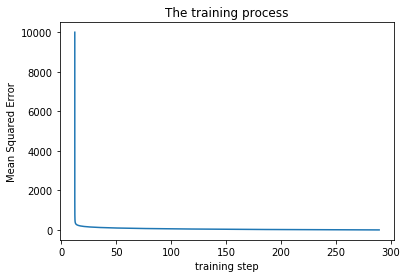

In [64]:
theta = train_model(train_x,train_y,dict(
    example_num_train_iter=10000,
    example_learning_rate=0.01
))

In [21]:
os.path.dirname(os.path.abspath(__file__))

NameError: name '__file__' is not defined

In [120]:
theta

array([22.48968986, -0.60894494, -0.40860338, -1.63990444,  3.06912177,
       -0.23229489, -2.60390073,  0.35222905, -2.1171635 ,  0.73060678,
       -3.70394096])

In [126]:
report_model(test_x,test_y,theta)

273.69588404018504

In [127]:
mse(X,Y,theta)

12.015302982862542